In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-personality-analysis/marketing_campaign.csv


In [2]:
df = pd.read_csv("../input/customer-personality-analysis/marketing_campaign.csv", sep='\t')
display(df.head())
display(df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.shape

(2240, 29)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df["Education"].value_counts()


Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [7]:
df["Year_Birth"].value_counts().head()


1976    89
1971    87
1975    83
1972    79
1978    77
Name: Year_Birth, dtype: int64

In [8]:
df["Year_Birth"].unique()


array([1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983,
       1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969,
       1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977,
       1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962,
       1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994,
       1941, 1944, 1995, 1940])

In [9]:
len(df["Year_Birth"].unique())


59

In [10]:
df["Income"].value_counts()


7500.0     12
35860.0     4
37760.0     3
83844.0     3
63841.0     3
           ..
40760.0     1
41452.0     1
6835.0      1
33622.0     1
52869.0     1
Name: Income, Length: 1974, dtype: int64

**To Find Percentage of unique values of a column**


In [11]:
df["Education"].value_counts(normalize=True)


Graduation    0.503125
PhD           0.216964
Master        0.165179
2n Cycle      0.090625
Basic         0.024107
Name: Education, dtype: float64

In [12]:
Education = df["Education"].value_counts(normalize=True)

type(Education)

pandas.core.series.Series

In [13]:
## Education now is a pandas.series
## Must convert to dataframe

Education = df["Education"].value_counts(normalize=True)
Education = pd.DataFrame(Education)

display(Education)

,Education
Graduation,0.503125
PhD,0.216964
Master,0.165179
2n Cycle,0.090625
Basic,0.024107


In [14]:
## Convert the index into a column

Education = df["Education"].value_counts(normalize=True)
Education = pd.DataFrame(Education)
print(Education.index)

Education = Education.reset_index()
display(Education)

## Fixing column names

Education = Education.rename(columns={"index":"Education", "Education":"% of Customer"})
##display(Education)

Education["% of Customer"]= Education["% of Customer"]*100
display(Education)

Education["% of Customer"]= np.round(Education["% of Customer"],2)
display(Education)

## to round off all columns
## Education = Education.round(2)
## display(Education)

Index(['Graduation', 'PhD', 'Master', '2n Cycle', 'Basic'], dtype='object')


,index,Education
0,Graduation,0.503125
1,PhD,0.216964
2,Master,0.165179
3,2n Cycle,0.090625
4,Basic,0.024107


,Education,% of Customer
0,Graduation,50.312500
1,PhD,21.696429
2,Master,16.517857
3,2n Cycle,9.062500
4,Basic,2.410714


,Education,% of Customer
0,Graduation,50.31
1,PhD,21.70
2,Master,16.52
3,2n Cycle,9.06
4,Basic,2.41


**BarPlot for "Education" column**


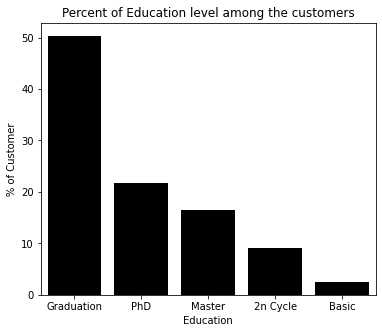

In [15]:
plt.figure(figsize = (6,5))
sns.barplot(x='Education', y='% of Customer', data=Education, color= "black")
plt.title("Percent of Education level among the customers")

plt.yticks(np.arange(0,51,10))
#plt grid()
plt.show()

In [16]:
np.arange(0,101,5)


array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100])

**BarPlot for "Year_Birth" column**


In [17]:
Year_Birth_count = df["Year_Birth"].value_counts(normalize=True)
Year_Birth_count = pd.DataFrame(Year_Birth_count)
#print(Year_Birth_count.index)

Year_Birth_count = Year_Birth_count.reset_index()
#display(Year_Birth_count)

## Fixing column names

Year_Birth_count = Year_Birth_count.rename(columns={"index":"Birth Year", "Year_Birth":"% of Customer"})
##display(Year_Birth_count)

Year_Birth_count = Year_Birth_count.sort_values(by='Birth Year')

Year_Birth_count["% of Customer"]= Year_Birth_count["% of Customer"]*100
#display(Year_Birth_count)

Year_Birth_count["% of Customer"]= np.round(Year_Birth_count["% of Customer"],2)
display(Year_Birth_count)

,Birth Year,% of Customer
56,1893,0.04
54,1899,0.04
57,1900,0.04
58,1940,0.04
55,1941,0.04
48,1943,0.31
49,1944,0.31
47,1945,0.36
43,1946,0.71
44,1947,0.71


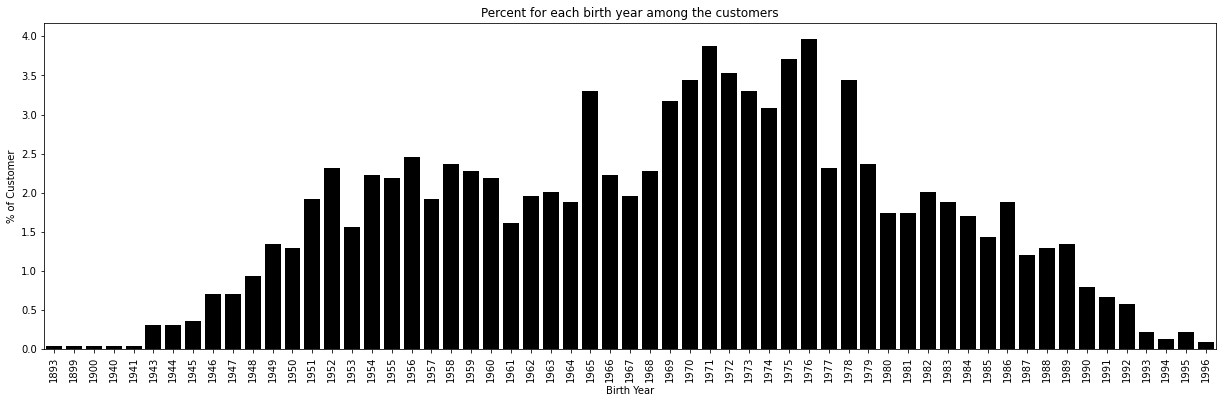

In [18]:
plt.figure(figsize = (21,6))
sns.barplot(x='Birth Year', y='% of Customer', data=Year_Birth_count, color= "black")
plt.title("Percent for each birth year among the customers")

plt.xticks(rotation=90)
#plt.yticks(np.arange(0,51,10))
#plt grid()
plt.show()

**SUBPLOTTING**

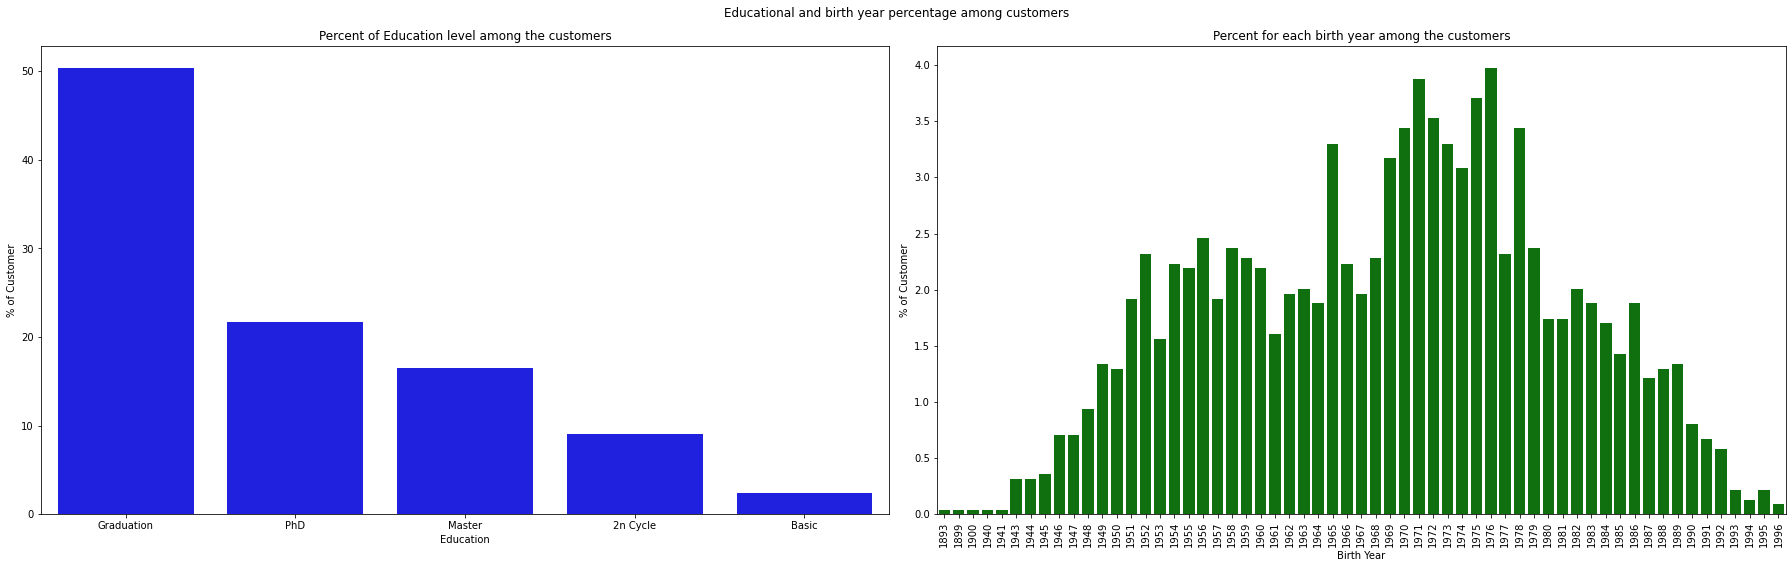

In [19]:
plt.figure(figsize = (25,8))

plt.subplot(1,2,1)
sns.barplot(x='Education', y='% of Customer', data=Education, color= "blue")
plt.title("Percent of Education level among the customers")
plt.yticks(np.arange(0,51,10))


plt.subplot(1,2,2)
sns.barplot(x='Birth Year', y='% of Customer', data=Year_Birth_count, color= "green")
plt.title("Percent for each birth year among the customers")
plt.xticks(rotation=90)

plt.suptitle("Educational and birth year percentage among customers")

plt.tight_layout()
plt.show()

**Create a function to find the number of observations of each unique value of a column of a DataFrame**


In [20]:
def unique_val_count(data,col):

    col_count = data[col].value_counts(normalize=True)
    col_count = pd.DataFrame(col_count)

    col_count = col_count.reset_index()

    col_count = col_count.rename(columns={"index":col, col:"% of Customer"})

    col_count["% of Customer"]= col_count["% of Customer"]*100

    col_count["% of Customer"]= np.round(col_count["% of Customer"],2)
    
    return col_count

In [21]:
Year_Birth = unique_val_count(df, 'Year_Birth')

display(Year_Birth)

,Year_Birth,% of Customer
0,1976,3.97
1,1971,3.88
2,1975,3.71
3,1972,3.53
4,1978,3.44
5,1970,3.44
6,1973,3.30
7,1965,3.30
8,1969,3.17
9,1974,3.08


In [22]:
Education_count = unique_val_count(df, 'Education')

display(Education_count)

,Education,% of Customer
0,Graduation,50.31
1,PhD,21.70
2,Master,16.52
3,2n Cycle,9.06
4,Basic,2.41


**Create a function to find the number of observations of each unique value of a column using BarPlot**


In [23]:
def barplot(data, x_col, y_col, color_x, rotation_x, yticks_x, range):

    sns.barplot(x=x_col, y=y_col, data=data, color= color_x)
    plt.title("Percent for each unique value of "+ x_col+" among the customers")
    plt.yticks(np.arange(0,yticks_x,range))
    plt.xticks(rotation=rotation_x)


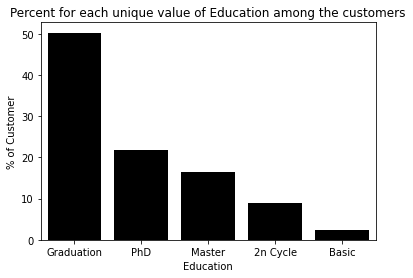

In [24]:
barplot(Education, 'Education', '% of Customer', "black", 0,55,10)


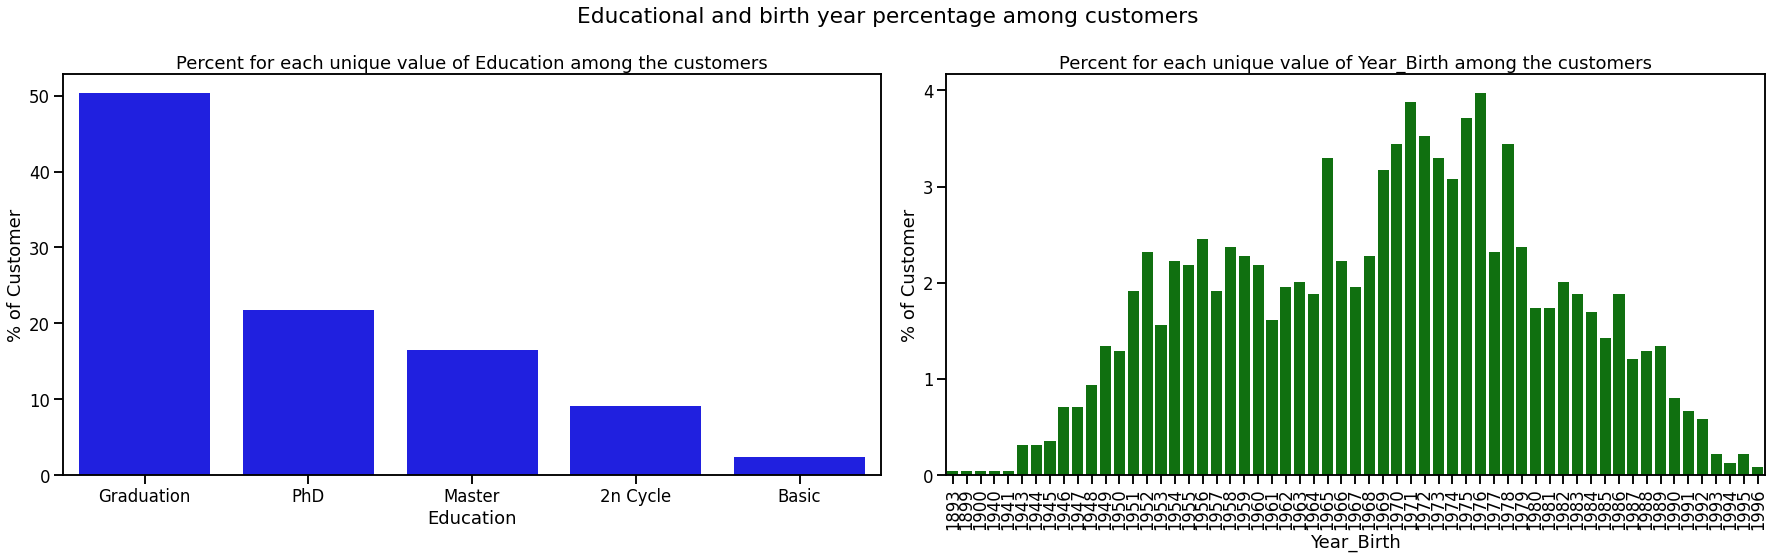

In [25]:
sns.set_context("talk")

plt.figure(figsize = (25,8))

plt.subplot(1,2,1)
barplot(Education, 'Education', '% of Customer', "blue", 0,55,10)


plt.subplot(1,2,2)
barplot(Year_Birth,'Year_Birth','% of Customer', "green", 90,5,1)


plt.suptitle("Educational and birth year percentage among customers")

plt.tight_layout()
plt.show()